In [0]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
from numpy import array
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My Drive/hand_writing

/content/drive/My Drive/hand_writing


In [0]:
!rm -rf images/
!mkdir images

In [0]:
!ls

images	lines.tgz  sentences.tgz  xml  xml.tgz


In [0]:
!tar xzf lines.tgz -C images/

In [0]:
%cd ../

/content/drive/My Drive/hand_writing/xml


In [0]:
def load_files():
  count = 0
  xml_files = os.listdir("xml/")
  file_names = []
  text = []
  for file_name in xml_files:
    try:
      count +=1
      tree = ET.parse("xml/"+file_name)
      root = tree.getroot()
      root = root[1]
      for hand_writing in root:
        if hand_writing.get("segmentation") =="ok":
          file_names.append(hand_writing.get("id"))
          text.append(hand_writing.get("text"))
    except:
      continue
  print(len(file_names))
  return file_names,text

In [7]:
files,text = load_files()

11344


In [0]:
input_file = open("name_file.csv","w+")
for index,file in enumerate(files):
  files[index] = "images/" + files[index].split("-")[0]+"/"+ files[index].split("-")[0]+"-"+files[index].split("-")[1]+"/"+files[index]+".png"
  #input_file.write(path+","+text[index]+"\n")
  

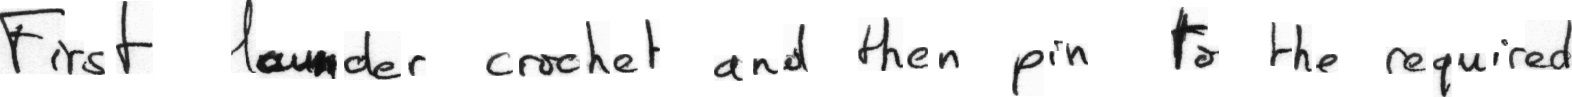

In [0]:
df = {'Name':files,'Text':text}

In [0]:
df = pd.DataFrame(df)

In [0]:
df.to_csv('input.csv')

In [0]:
from google.colab import files
files.download('input.csv') 

In [0]:
def load_data(df):
  images = []
  for i in range(df.shape[0]):
    images.append(array(Image.open(df["Name"][i])))
  return images

In [0]:
images = load_data(df)

In [0]:
def preprocess(image):
  #image = cv2.GaussianBlur(image,(5,5),0)
  ret,thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  thresh = cv2.resize(thresh,(1700,128))
  return thresh

In [0]:
preprocessed_images = []
for image in images:
  preprocessed_images.append(preprocess(image))

In [0]:
with open('processed/images.pickle', 'wb') as handle:
    pickle.dump(preprocessed_images, handle)